In [7]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, GPT2Tokenizer, GPT2Model 

from tqdm import tqdm
import random
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#load les fichiers qui m'interessent
selected_csv = ['synthetic_credit_consumers.csv', 'synthetic_smes.csv']
data_consumers = pd.read_csv(selected_csv[0], sep=',', header=0)
data_smes = pd.read_csv(selected_csv[1], sep=',', header=0)

data_loan

,CustomerID,Name,Age,CreditScore,TransactionAmount,LoanAmount,LatePayments
0,e11fa949-37eb-4999-bdbd-5d3c401b80fa,Chloe Cooke,43.0,592.0,5014.0,2678.0,2.0
1,416c9fe3-d43b-45a5-978e-aa8a4311b5c9,Curtis Nguyen,36.0,337.0,2265.0,1354.0,5.0
2,b1b99342-704e-449f-90f7-2c5287518e1f,Joseph Gonzalez,47.0,529.0,2975.0,4134.0,2.0
3,67a301f6-c1ad-49be-92f6-36e6201c82ac,Anthony Webster,32.0,810.0,4140.0,2108.0,2.0
4,a90ff7c6-c1ac-4fe5-896f-dfb1685b7a3b,Felicia Blair,63.0,394.0,6080.0,4282.0,0.0
...,...,...,...,...,...,...,...
995,1cf2307b-d8e3-4eb4-8310-63c8239fffb3,Jonathan Rivera,27.0,776.0,1715.0,3977.0,1.0
996,2278ed8f-25d3-44e7-8d5c-0aabec843f0a,Timothy Fernandez,61.0,740.0,4528.0,4229.0,5.0
997,64d14cc7-996d-4f4b-b636-5b2e253e40b0,Deborah Johnson,41.0,432.0,563.0,2266.0,0.0
998,6c7f4a6c-cd56-46d7-8ef9-3e69ad8d4490,Joshua Murray,43.0,821.0,4576.0,4315.0,2.0


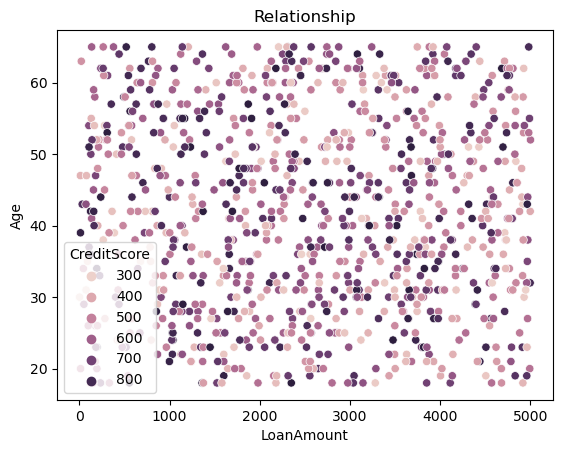

In [13]:
#cherche des bias sur les individus
# Scatter plot pour la relation entre l'âge et le credit score
sns.scatterplot(data=data_consumers, x='LoanAmount', y='Age', hue='CreditScore')
plt.title('Relationship')
plt.show()

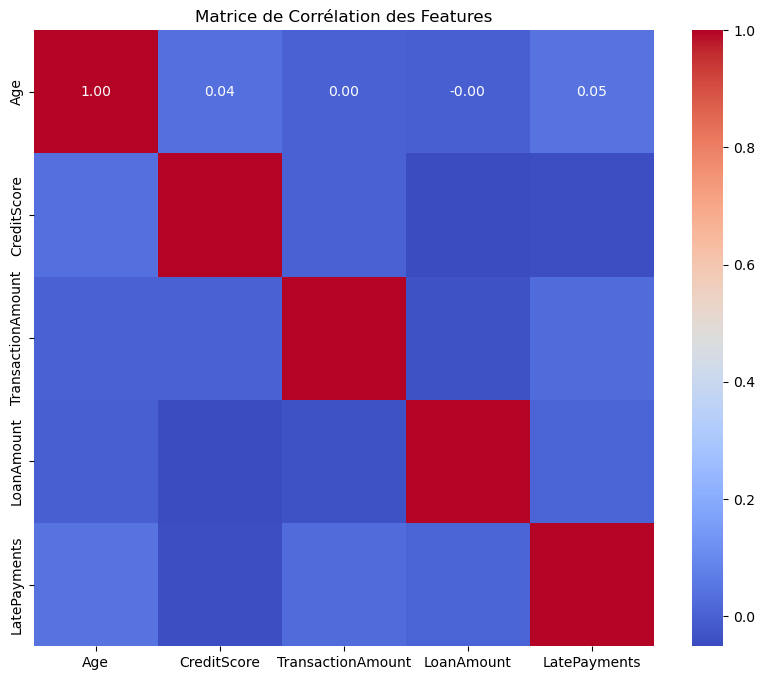

In [12]:

# Calculer la matrice de corrélation
corr_matrix = data_consumers[['Age', 'CreditScore', 'TransactionAmount', 'LoanAmount', 'LatePayments']].corr()

# Afficher la matrice de corrélation avec Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Features')
plt.show()

In [14]:
#j'abandonne ce dataset car pas de correlation, synthetiquement avec de l'aleatoire et pas de logique